# Proyecto 1 -- Regresión a Pie

Data fields
Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.


OverallQual: Overall material and finish quality, rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
       
       
* 1stFlrSF: First Floor square feet  
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)  
* YearBuilt: Original construction date  
* LotFrontage: Linear feet of street connected to property

In [15]:
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the data
with zipfile.ZipFile("proyecto_data.zip") as zip_file:
    data = np.load(zip_file.open('proyecto_training_data.npy'))

df = pd.DataFrame(data, columns=['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])

2. Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento(80 %) y validaci´on
y pruebas(20 %).

In [45]:
train, test = train_test_split(df, test_size=.8)
train.notna().sum()

SalePrice       292
OverallQual     292
1stFlrSF        292
TotRmsAbvGrd    292
YearBuilt       292
LotFrontage     243
dtype: int64

3. An´alisis exploratorio de datos: Para cada variable en el dataset calcular((usando numpy o
pandas):
media
valor m´aximo
valor m´ınimo
rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)
desviaci´on est´andar

In [26]:
exploratory = train.describe().loc[['mean', 'std', 'min', 'max']]
exploratory.loc['range'] = exploratory.loc['max'] - exploratory.loc['min']
print('Analisis exploratiorio de variables')
exploratory

Analisis exploratiorio de variables


,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
mean,179251.537671,5.996575,1165.989726,6.482877,1969.630137,67.806584
std,86788.889095,1.343172,358.810851,1.558608,30.125286,21.286894
min,55000.000000,3.000000,372.000000,3.000000,1882.000000,21.000000
max,745000.000000,10.000000,2898.000000,12.000000,2009.000000,160.000000
range,690000.000000,7.000000,2526.000000,9.000000,127.000000,139.000000


4. Para cada variable en el dataset usar seaborn(funci´on distplot https://seaborn.pydata.org/generated/seaborn.distplot.html) para graficar un histograma de la variable.

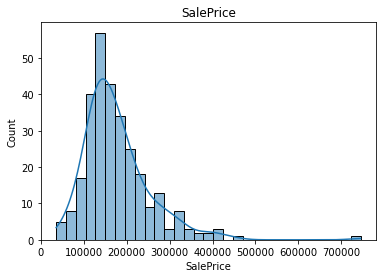

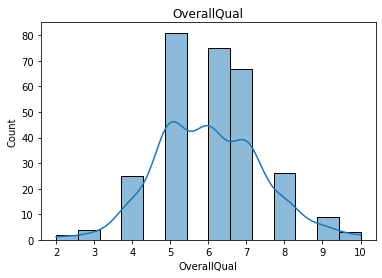

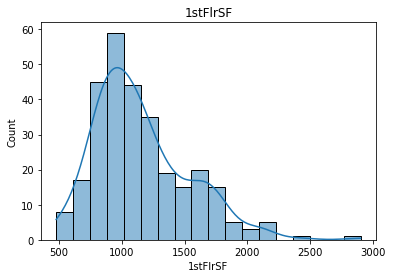

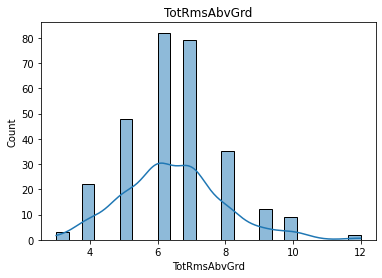

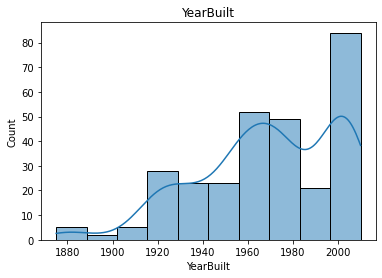

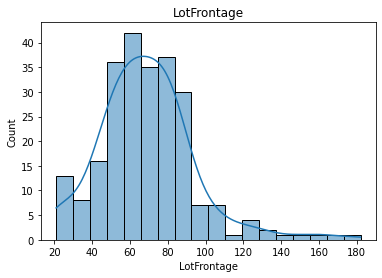

In [30]:
for col in train.columns:
    sns.histplot(data=train, x=col, kde=True, label=col)
    plt.title(col)
    plt.show()

5. Para cada variable independiente x :
* Calcular el coeficiente de correlaci´on entre x y y.
* Graficar x vs y(scatterplot) usando matplotlib.
* Colocar el coeficiente de correlaci´on y colocarlo como parte del t´ıtulo de la gr´afica.
* Basado en la gr´afica y el coeficiente de correlaci´on de cada par x,y elegir las 2 variables
con m´as potencial predictivo es decir las 2 variables que presentan mayor correlaci´on
entre dicha variable y la variable dependiente.

In [50]:
y_train = train.pop('SalePrice')
y_test = test.pop('SalePrice')

OverallQual     0.7760
1stFlrSF        0.5987
YearBuilt       0.5355
TotRmsAbvGrd    0.5194
LotFrontage     0.3801
dtype: float64

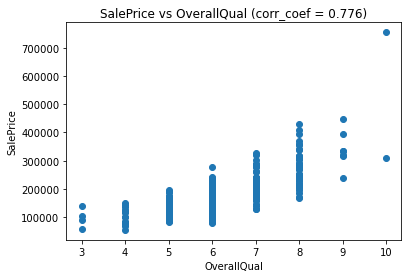

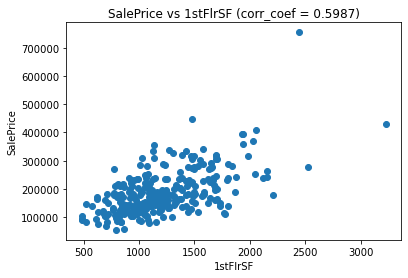

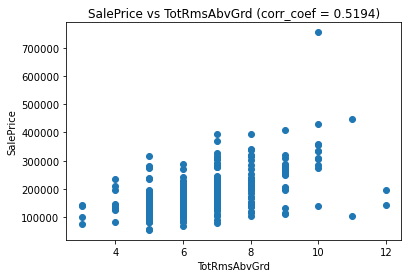

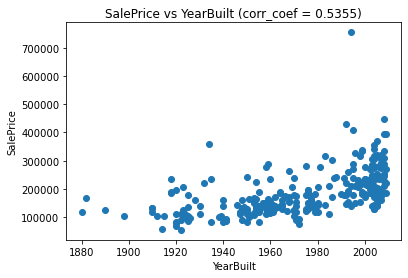

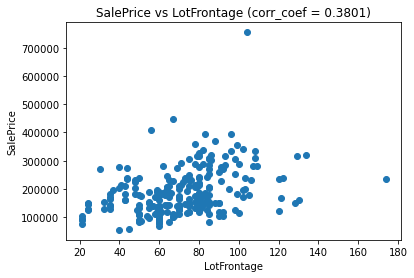

In [63]:
def plot_corr_variables (train, y_train):
    corr_coef = {}
    for var in train.columns:
        x = train[train[var].notna()][var]
        y = y_train[train[var].notna()]
        corr = np.corrcoef(x, y)[1][0].round(4)
        corr_coef[var] = corr
        fig, ax = plt.subplots()
        ax.scatter(x, y)
        ax.set_ylabel(y.name)
        ax.set_xlabel(x.name)
        ax.set_title('{} vs {} (corr_coef = {})'.format(y.name, x.name, corr))
    return pd.Series(corr_coef).sort_values(ascending=False)


plot_corr_variables(train, y_train)


6. Crear una funci´on para entrenar un modelo de regresi´on lineal de una variable y = β0 +β1 ∗x.
La funci´on recibe como argumentos:  
    6.1 Vector con la variable independiente x,  
    6.2 Vector con la variable dependiente y,  
    6.3 un entero epochs que indica por cuantas iteraciones entrenar el modelo.  
    6.4 un entero imprimir error cada , que nos indica cada cuantas iteraciones queremos
imprimir a trav´es de print: el nu´mero de iteraci´on, el error del modelo en esa iteraci´on, si imprimir error cada = 10, se despliega en pantalla el error en las iteraciones:
10,20,30,40,50.  
    6.5 escalar α(learning rate): es usado como parte de la expresi´on matem´atica para actualizar
en cada iteraci´on los par´ametros del modelo.

In [93]:
# 6.1 a 6.5
def linear_reg_fit (x, y, epoch, error_cada, learning_rate = 0.005):
    # adding beta0 column
    X = np.column_stack((x, np.ones(len(x))))

    betas = np.zeros(2)
    errors = {'error': []}
    betas_iter = []
    for ep in range(epoch):
        yhat = X@betas

        betas_iter.append (betas)
        error = (((y - yhat)**2) / len(y)).sum()
        errors['error'].append (error)

        grad = X.T@(yhat - y) / len(y)
        betas = betas - grad*learning_rate

        if ep%error_cada == 0:
            print('Error en iteracion {}: {}'.format(ep, error))
    return np.array(betas_iter), pd.DataFrame(errors)

betas, errors = linear_reg_fit(train['OverallQual'], y_train, 200, 100)




Error en iteracion 0: 40887033977.52397
Error en iteracion 100: 2973096235.0947847


Crear una funci´on que nos permita visualizar con matplotlib c´omo cambia el error en
el tiempo: crear una funci´on que tome como par´ametro el vector de errores generados
por la funci´on de entrenamiento y grafique en el eje x el nu´mero de iteraci´on y en
el eje y el error para esa iteraci´on.

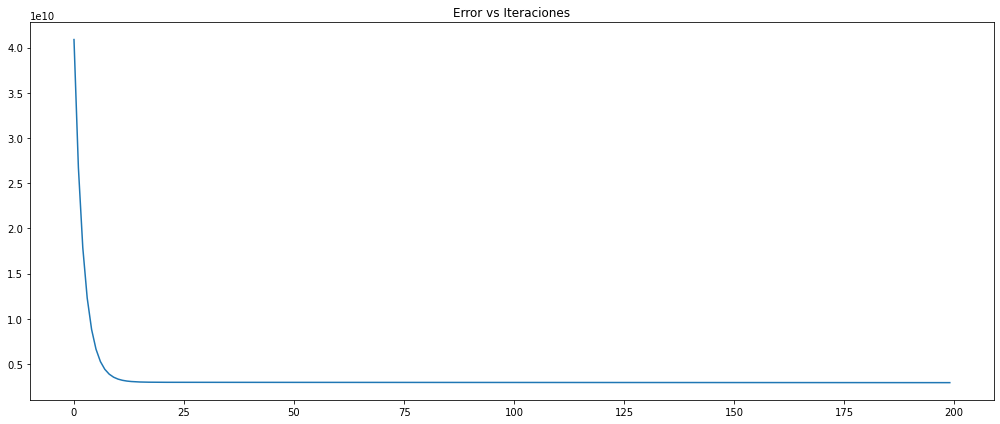

In [173]:
def error_per_iter (errors):
    fig = plt.figure(figsize=(14, 6))
    plt.plot(errors)
    plt.title('Error vs Iteraciones')
    
error_per_iter(errors)

Crear una funci´on que nos permita visualizar con matplotlib c´omo evoluciona el
modelo entrenado en el tiempo : Crear una funci´on que tome como par´ametro la
estructura de datos conteniendo el historial de modelos ,y un valor ?n? que indica
cada cuantas iteraciones graficar el modelo resultante, por ejemplo para n=3 la
funci´on debe graficar la recta correspondiente al modelo junto a los datos cada 3
iteraciones, si se ejecutaron 15 iteraciones , para n = 3 se grafica el modelo de las
iteraciones 3,6,9,12,15 junto con los datos de entrenamiento.

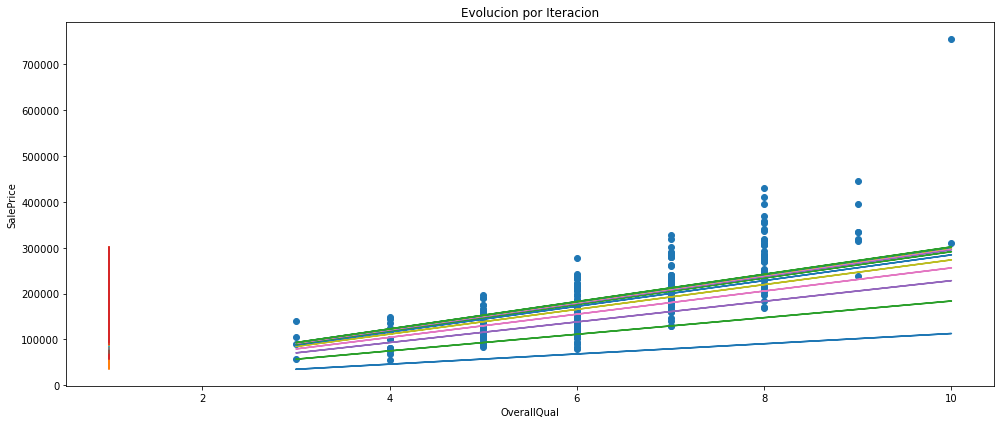

In [229]:
def plot_evolution (x, y, betas, n_plot):
    fig = plt.figure(figsize=(14,6))
    x = x[y.notna()]
    y = y[y.notna()]
    plt.scatter(x, y)
    X = np.column_stack((x, np.ones(len(x))))
    plt.title('Evolucion por Iteracion')
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    

    for i in range(len(betas)):
        if i%n_plot == 0 and i > 0:
            plt.plot(X, X@betas[i], label=f'n = {i}')
    plt.show()

plot_evolution(train['OverallQual'], y_train, betas, 2)


### Parte de scikit-learn

Error en iteracion 0: 40887033977.52397
Error en iteracion 0: 40887033977.52397


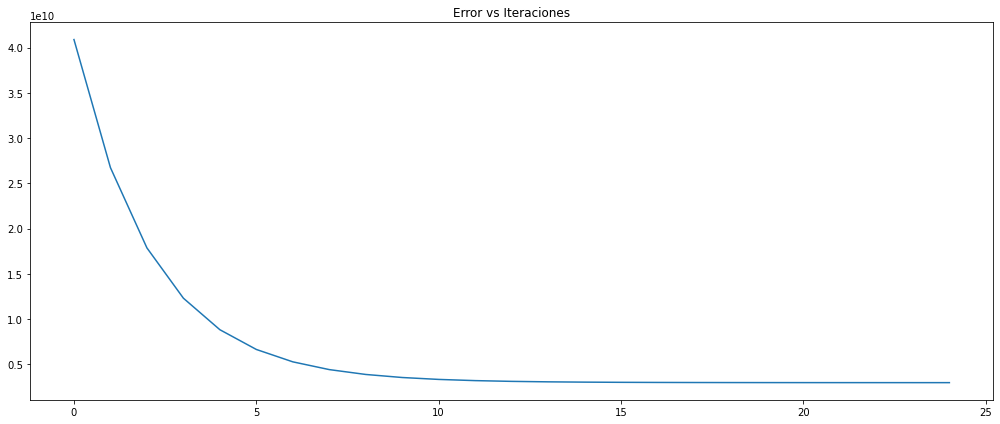

In [213]:
betas1, errors1 = linear_reg_fit(train['OverallQual'], y_train, 25, 100)
betas2, errors2 = linear_reg_fit(train['1stFlrSF'], y_train, 20, 1000,1e-7)

error_per_iter(errors1)


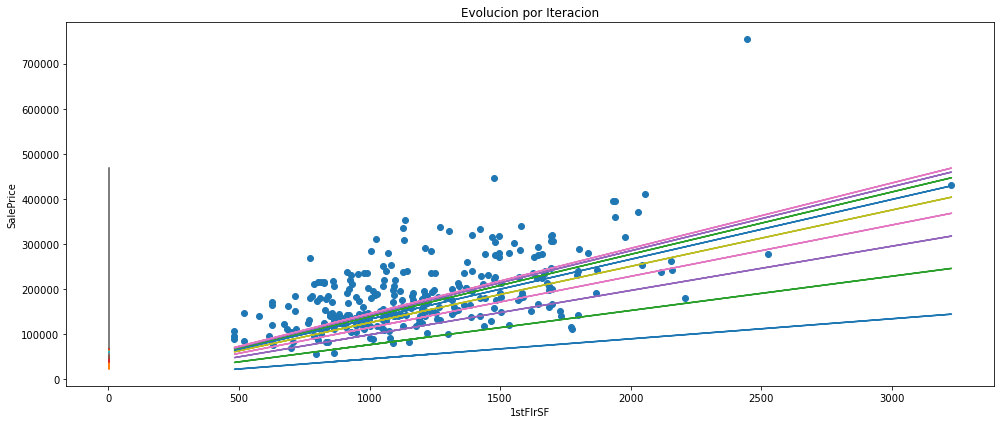

In [184]:
plot_evolution(train['1stFlrSF'], y_train, betas2, 2)


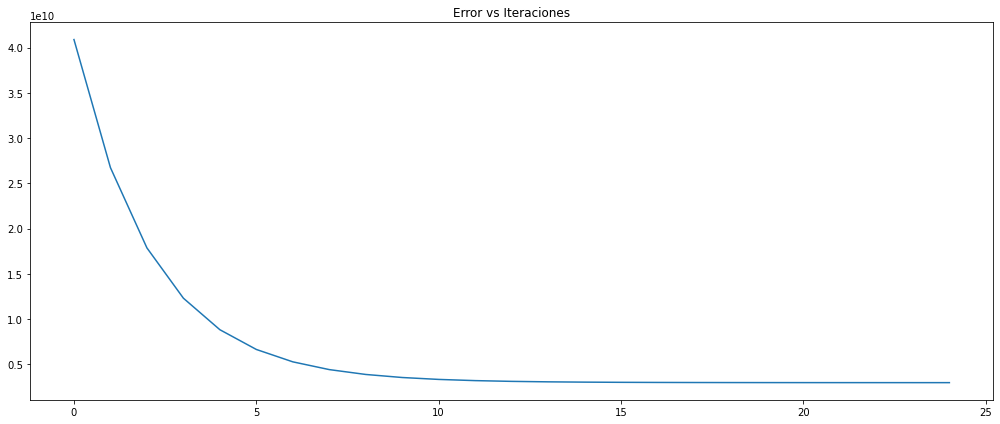

In [230]:
error_per_iter(errors1)


In [215]:
# Regresion lienal con sklearn
from sklearn.linear_model import LinearRegression
lregresor_x1 = LinearRegression()
lregresor_x1.fit(np.array(train['OverallQual']).reshape(-1, 1), y_train)

lregresor_x2 = LinearRegression()
lregresor_x2.fit(np.array(train['1stFlrSF']).reshape(-1, 1), y_train)



LinearRegression()

In [228]:
def betas_mean (sk, manual):
    return np.mean([sk, manual], axis=0)

betas_mean(betas1[-1], np.array([lregresor_x1.coef_[0], lregresor_x1.intercept_]))    

array([ 38358.2480068, -51498.5830749])

In [227]:
a = betas1[-1]
b = np.array([lregresor_x1.coef_[0], lregresor_x1.intercept_])



array([ 38358.2480068, -51498.5830749])